<a href="https://colab.research.google.com/github/ParvinGhaffarzadeh/CIFAR-10/blob/main/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -xvzf cifar-10-python.tar.gz

--2021-03-24 17:44:22--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz.1’

cifar-10-python.tar 100%[===================>] 162.60M  22.9MB/s    in 9.9s    

2021-03-24 17:44:32 (16.4 MB/s) - ‘cifar-10-python.tar.gz.1’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [ ]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dic = pickle.load(fo, encoding='bytes')
    return dic

In [ ]:
data1 = unpickle('cifar-10-batches-py/data_batch_1')
data2 = unpickle('cifar-10-batches-py/data_batch_2')
print(data1.keys())

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


In [ ]:
X1 = data1[b'data']
y1 = np.array(data1[b'labels'])

X2 = data2[b'data']
y2 = np.array(data2[b'labels'])

In [ ]:
X = np.vstack((X1, X2))
y = np.hstack((y1, y2))

In [ ]:
X = X / 255

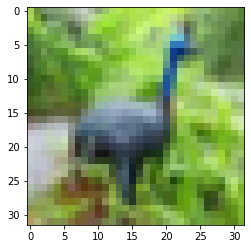

In [ ]:
plt.imshow(X[6].reshape(3, 32, 32).transpose([1, 2, 0])) 

In [ ]:
print(X.shape)

(20000, 3072)


In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(100,),
                    batch_size=64,
                    verbose=False,
                    max_iter=1,
                    warm_start=True)

In [ ]:
X_train = X[:-2000]
X_val = X[-2000:]

y_train = y[:-2000]
y_val = y[-2000:]

In [ ]:
train_accs = []
val_accs = []

for epoch in range(20):
    clf.fit(X_train, y_train)

    train_accs.append(clf.score(X_train, y_train))
    val_accs.append(clf.score(X_val, y_val))

    print('train_acc :', train_accs[-1], 'val_acc :', val_accs[-1])

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


train_acc : 0.3098888888888889 val_acc : 0.3045
train_acc : 0.3393888888888889 val_acc : 0.3365
train_acc : 0.3785 val_acc : 0.371
train_acc : 0.36994444444444446 val_acc : 0.3665
train_acc : 0.3710555555555556 val_acc : 0.359
train_acc : 0.392 val_acc : 0.3745
train_acc : 0.4031666666666667 val_acc : 0.38
train_acc : 0.3995 val_acc : 0.3635
train_acc : 0.4073333333333333 val_acc : 0.39
train_acc : 0.393 val_acc : 0.374
train_acc : 0.4240555555555556 val_acc : 0.3935
train_acc : 0.39555555555555555 val_acc : 0.376
train_acc : 0.4245555555555556 val_acc : 0.3925
train_acc : 0.42894444444444446 val_acc : 0.3995
train_acc : 0.42644444444444446 val_acc : 0.4085
train_acc : 0.42816666666666664 val_acc : 0.398
train_acc : 0.43766666666666665 val_acc : 0.402
train_acc : 0.41233333333333333 val_acc : 0.383
train_acc : 0.44122222222222224 val_acc : 0.4125
train_acc : 0.434 val_acc : 0.3945


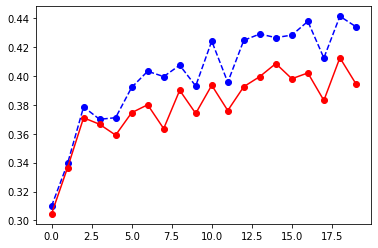

In [ ]:
plt.plot(train_accs, 'b--o')
plt.plot(val_accs, 'r-o')

In [ ]:
clf.score(X, y)

0.43005

([<matplotlib.axis.YTick at 0x7fe77c8670f0>,
 [Text(0, 0, 'airplane'),
  Text(0, 0, 'automobile'),
  Text(0, 0, 'bird'),
  Text(0, 0, 'cat'),
  Text(0, 0, 'deer'),
  Text(0, 0, 'dog'),
  Text(0, 0, 'frog'),
  Text(0, 0, 'horse'),
  Text(0, 0, 'ship'),
  Text(0, 0, 'truck')])

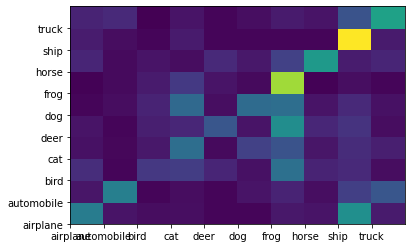

In [ ]:
pred = clf.predict(X_val)

cm = confusion_matrix(y_val, pred)
plt.pcolormesh(cm)

plt.xticks(range(10), ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
plt.yticks(range(10), ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

In [ ]:
from sklearn.metrics import plot_confusion_matrix

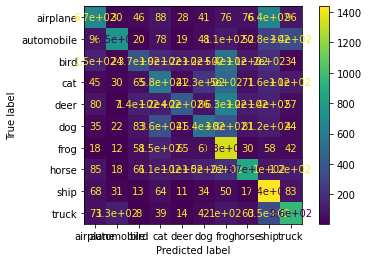

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
disp = plot_confusion_matrix(clf, X_train, y_train,
                                 display_labels=class_names)

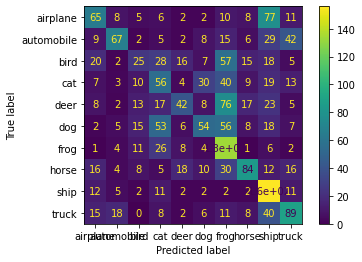

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
disp = plot_confusion_matrix(clf, X_val, y_val,
                                 display_labels=class_names)

In [ ]:
clf_as = MLPClassifier(hidden_layer_sizes=(100,),
                    batch_size=64)    

In [ ]:
clf_as.fit(X_train[(y_train == 0) + (y_train == 8)],
           y_train[(y_train == 0) + (y_train == 8)])

MLPClassifier(activation='relu', alpha=0.0001, batch_size=64, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
clf_as.score(X_train[(y_train == 0) + (y_train == 8)],
           y_train[(y_train == 0) + (y_train == 8)])

0.89505830094392

In [ ]:
clf_as.score(X_val[(y_val == 0) + (y_val == 8)],
           y_val[(y_val == 0) + (y_val == 8)])

0.7844611528822055

([<matplotlib.axis.YTick at 0x7fe77c2e35c0>,
 [Text(0, 0, 'airplane'),
  Text(0, 0, 'automobile'),
  Text(0, 0, 'bird'),
  Text(0, 0, 'cat'),
  Text(0, 0, 'deer'),
  Text(0, 0, 'dog'),
  Text(0, 0, 'frog'),
  Text(0, 0, 'horse'),
  Text(0, 0, 'ship'),
  Text(0, 0, 'truck')])

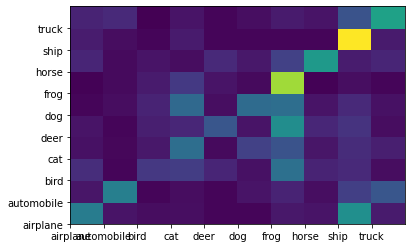

In [ ]:
pred = clf.predict(X_val)
pred2 = clf_as.predict(X_val[(pred == 0) + (pred == 8)])
# pred[(pred == 0) + (pred == 8)] = pred2

cm = confusion_matrix(y_val, pred)
plt.pcolormesh(cm)

plt.xticks(range(10), ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
plt.yticks(range(10), ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

([<matplotlib.axis.YTick at 0x7fe79e7af048>,
 [Text(0, 0, 'airplane'),
  Text(0, 0, 'automobile'),
  Text(0, 0, 'bird'),
  Text(0, 0, 'cat'),
  Text(0, 0, 'deer'),
  Text(0, 0, 'dog'),
  Text(0, 0, 'frog'),
  Text(0, 0, 'horse'),
  Text(0, 0, 'ship'),
  Text(0, 0, 'truck')])

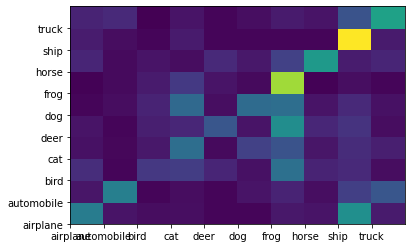

In [ ]:
pred = clf.predict(X_val)
pred2 = clf_as.predict(X_val[(pred == 0) + (pred == 8)])
# pred[(pred == 0) + (pred == 8)] = pred2

cm = confusion_matrix(y_val, pred)
plt.pcolormesh(cm)

plt.xticks(range(10), ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
plt.yticks(range(10), ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])